# Supplemental figure comparing clustering from SA and IA

both for CD4 and CD8 data

In [52]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pickle
import json
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib

import dynscsvi.plots as plots
import dynscsvi.utilities as utils

tex_fonts = {
    "font.family" : "Helvetica",
    'pdf.fonttype' : 42,
}

plt.rcParams.update(tex_fonts)

tabcolors =  [matplotlib.colors.to_hex(plt.cm.tab20(i/20)) for i in range(20)]
tabcolors = [tabcolors[2*i] for i in range(10)] + [tabcolors[2*i+1] for i in range(10)]

## Import CD8 data

* we need both the results from the IA and SA clusterings
* We also import names given to clusters in these analyses

In [53]:
# import CD8 data

with open("../results/data_IA_fitting.pkl", 'rb') as f:
    data_IA_fit_CD8 = pickle.load(f)
    
raw_clus_CD8 = data_IA_fit_CD8["raw_clus"]
clus_relabel_dict_CD8 = data_IA_fit_CD8["clus_relabel_dict"]
clus_freq_array_CD8 = data_IA_fit_CD8["clus_freq_array"]

num_clus_CD8 = len(clus_relabel_dict_CD8)
clus_sorted_by_size_CD8 = sorted(list(range(num_clus_CD8)), key=lambda x: clus_relabel_dict_CD8[x])

idxs_test_train_CD8 = data_IA_fit_CD8["idxs_test_train"]

with open("../results/fancy_names_IA_CD8.pkl", 'rb') as f:
    cluster_names_CD8 = pickle.load(f)

# we need data from the SA clustering figure: the Leiden cluster assignment

with open("../results/data_SA_clustering.pkl", 'rb') as f:
    data_SA_clus_CD8 = pickle.load(f)

with open("../results/fancy_names_SA_CD8.pkl", 'rb') as f:
    fancy_names_CD8 = pickle.load(f)


## Import the CD4 data

In [54]:
# import CD4 data

with open("../results/data_IA_fitting_CD4.pkl", 'rb') as f:
    data_IA_fit_CD4 = pickle.load(f)
    
raw_clus_CD4 = data_IA_fit_CD4["raw_clus"]
clus_relabel_dict_CD4 = data_IA_fit_CD4["clus_relabel_dict"]
clus_freq_array_CD4 = data_IA_fit_CD4["clus_freq_array"]

num_clus_CD4 = len(clus_relabel_dict_CD4)
clus_sorted_by_size_CD4 = sorted(list(range(num_clus_CD4)), key=lambda x: clus_relabel_dict_CD4[x])

idxs_test_train_CD4 = data_figure5_CD4["idxs_test_train"]

with open("../results/fancy_names_IA_CD4.pkl", 'rb') as f:
    cluster_names_CD4 = pickle.load(f)

# we need data from the SA clustering figure: the Leiden cluster assignment

with open("../results/data_SA_clustering_CD4.pkl", 'rb') as f:
    data_SA_clus_CD4 = pickle.load(f)

fancy_names_file = f"../results/fancy_names_SA_CD4.pkl"
with open(fancy_names_file, 'rb') as f:
    fancy_names_CD4 = pickle.load(f)


## Prepare the required data: cell type assignments for each method and lineage

We have to make sure that we're using the same cells in both analyses

In [55]:
ct_SA_CD8 = data_SA_clus_CD8["celltypes"][idxs_test_train_CD8]
ct_IA_CD8 = np.array([cluster_names_CD8[clus_relabel_dict_CD8[i]] for i in raw_clus_CD8])

cluster_names_CD8_SA = data_SA_clus_CD8["celltype_names"]

ct_SA_CD4 = data_SA_clus_CD4["celltypes"][idxs_test_train_CD4]
ct_IA_CD4 = np.array([cluster_names_CD4[clus_relabel_dict_CD4[i]] for i in raw_clus_CD4])

cluster_names_CD4_SA = data_SA_clus_CD4["celltype_names"]

## Create the figure

Use the Jaccard index to measure similarity between clusters assigned by SA vs. IA

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


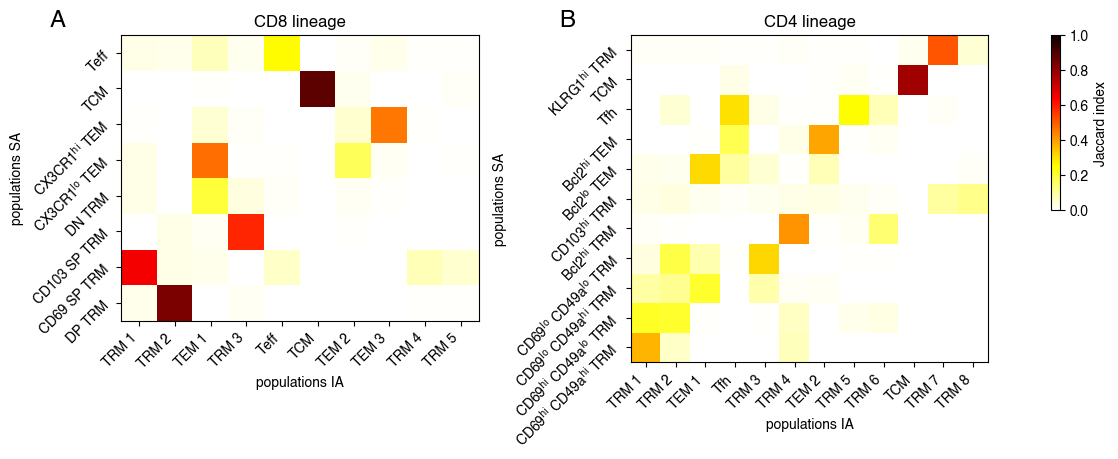

In [56]:
def jaccard_index(b1, b2):
    union = np.sum(b1 | b2)
    intersection = np.sum(b1 & b2)
    return intersection / union


def plot_jaccard_index(ax, ct_SA, ct_IA, names_SA=None, names_IA=None, cax=None,
                       fancy_names_SA=None, fancy_names_IA=None):
    unames_SA = np.unique(ct_SA) if names_SA is None else names_SA
    unames_IA = np.unique(ct_IA) if names_IA is None else names_IA

    fancy_names_SA = unames_SA if fancy_names_SA is None else fancy_names_SA
    fancy_names_IA = unames_IA if fancy_names_IA is None else fancy_names_IA
    
    nc_SA = len(unames_SA)
    nc_IA = len(unames_IA)
    
    M = np.zeros((nc_SA, nc_IA))
    
    for i1, n1 in enumerate(unames_SA):
        for i2, n2 in enumerate(unames_IA):
            b1 = ct_SA == n1
            b2 = ct_IA == n2
            M[i1, i2] = jaccard_index(b1, b2)

    cs = ax.pcolor(M, cmap='hot_r', vmin=0, vmax=1)

    if cax is not None:
        cx = fig.colorbar(cs, ax=cax, location='right')
        cx.set_label("Jaccard index")
        
    
    ax.set_aspect('equal', anchor='NW')
    
    ax.set_xlabel("populations IA")
    ax.set_ylabel("populations SA")
    
    ax.set_xticks(np.linspace(0, nc_IA-1, nc_IA)+0.5)
    ax.set_yticks(np.linspace(0, nc_SA-1, nc_SA)+0.5)
    
    ax.set_xticklabels(fancy_names_IA, rotation=45, ha='right')
    ax.set_yticklabels(fancy_names_SA, rotation=45, ha='right')


fig = plt.figure(figsize = (14,5))

gs = GridSpec(2,15)

fig.subplots_adjust(wspace=0.1)

ax = fig.add_subplot(gs[:,:5])
bx = fig.add_subplot(gs[:,7:12])
cx = fig.add_subplot(gs[0,12])

cx.axis('off')

Ax = fig.add_subplot(gs[0,:5])
Bx = fig.add_subplot(gs[0,7:12])

for Xx in [Ax, Bx]:
    Xx.axis('off')


plot_jaccard_index(ax, ct_SA_CD8, ct_IA_CD8, names_SA=cluster_names_CD8_SA, names_IA=cluster_names_CD8,
                   fancy_names_SA=[fancy_names_CD8[name] for name in cluster_names_CD8_SA])
plot_jaccard_index(bx, ct_SA_CD4, ct_IA_CD4, names_SA=cluster_names_CD4_SA, names_IA=cluster_names_CD4, 
                   cax=cx, fancy_names_SA=[fancy_names_CD4[name] for name in cluster_names_CD4_SA])

ax.set_title("CD8 lineage")
bx.set_title("CD4 lineage")

#fig.align_xlabels()

labx, laby = -0.2, 1.05
Ax.text(labx, laby, 'A', fontsize='xx-large', transform=Ax.transAxes)
Bx.text(labx, laby, 'B', fontsize='xx-large', transform=Bx.transAxes)


#fig.savefig("../results/FigureClusCompare.pdf", bbox_inches="tight")